In [1]:
from mxnet import autograd,nd
import matplotlib.pyplot as plt
from IPython import display
import random
%matplotlib inline

3.2.1 ⽣成数据集

In [2]:
num_inputs = 2
num_examples = 1000
ture_w = [2,3.4]
ture_b = 4.2
features = nd.random.normal(scale = 1,shape = (num_examples,num_inputs))
labels = ture_w[0] * features[:, 0] + ture_w[1] * features[ :, 1] + ture_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>,
 
 [11.263813]
 <NDArray 1 @cpu(0)>)

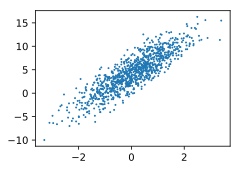

In [4]:
def use_svg_display():
    # ⽤⽮量图显⽰。
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
# 设置图的尺⼨。
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

3.2.2 读取数据

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = nd.array(indices[i: min(i+ batch_size,num_examples)])
        yield features.take(j),labels.take(j) # take 函数根据索引返回对应元素。

In [14]:
batch_size =10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break


[[ 0.4652423  -0.5965788 ]
 [ 0.39343107 -0.46811363]
 [ 0.42352363 -1.2845391 ]
 [ 1.4984084  -0.45594302]
 [ 1.552788    0.5977058 ]
 [-0.7437719   0.56905705]
 [-0.53532964  2.2085247 ]
 [-0.36925605 -1.0998679 ]
 [-1.2338163   0.9152749 ]
 [-0.92776704 -0.05906383]]
<NDArray 10x2 @cpu(0)> 
[ 3.1044972   3.3966293   0.69170153  5.634059    9.345868    4.6453876
 10.633517   -0.26568547  4.841172    2.1516535 ]
<NDArray 10 @cpu(0)>


In [15]:
#yield的用法  生成器还有return的功能
def foo():
    print("starting...")
    while True:
        res = yield 4
        print("res:",res)
g = foo()
print(next(g))
print("*"*20)
print(next(g))

starting...
4
********************
res: None
4


3.2.3 初始化模型参数

In [28]:
w = nd.random.normal(scale = 0.01,shape = (num_inputs,1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()  #分配存储空间

3.2.4 定义模型

In [29]:
def linreg(X,w,b):
    return nd.dot(X,w)+b